### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Load dataset 
df = joblib.load('boltztrap_mp_merged_v2.pkl')

# Define features and target variable
features = joblib.load('features_seebeck.pkl')
print('No. of features', len(features))

df.head()

No. of features 3640


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,pf_n,pf_p,s_n,s_p,m_n,m_p
0,-2,5,7,3.951631,1,0.803211,0.108118,-282000.0,1.25,2.55,...,1,0,0,0,0.865,0.0125,-421.0,760.0,0.578,72.800
1,-2,3,5,2.645751,1,0.851088,0.178743,-364000.0,2.06,2.06,...,0,1,0,0,1.050,0.6440,-393.0,567.0,0.541,4.020
2,-3,3,6,2.770274,1,0.327599,0.073868,-216000.0,0.38,1.26,...,0,0,0,0,0.977,0.4200,-305.0,471.0,0.270,1.020
3,-1,3,4,2.070197,1,0.894601,0.188900,-328000.0,2.37,3.00,...,0,0,0,1,0.889,0.0257,-416.0,871.0,0.548,20.300
4,-3,4,7,3.605551,1,0.000025,0.000003,-144000.0,-0.01,-0.01,...,0,0,0,0,0.719,1.5700,-496.0,510.0,1.160,0.667


In [3]:
target = 's_n'

print(target)
print('Max value:', df[target].max())
print('Min value:', df[target].min())

s_n
Max value: 655.0
Min value: -1120.0


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\3. thermal_electric (done)


In [5]:
# Split dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

In [6]:
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'

# Save unscaled data
joblib.dump(df_train, path_to_save + 'df_train_' + target + '.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/s_n_results/df_test_s_n.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                
                                
# Create pandas.Dataframe of scaled test set using scaler as defined using training set
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, path_to_save + 'df_train_' + target + '_scaled.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '_scaled.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/s_n_results/df_test_s_n_scaled.pkl']

#### GBFS

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 's_n'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_seebeck.pkl'

problem = 'regression'

In [3]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = False, 
            problem = problem
            )

Name of target column:  s_n
No. of exploratory features:  3640


In [4]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        cv_folds = 1
        )

Model employed:  lightGBM
Total no. of permutations: 18


   (1 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 5711
   Metric score:  -35117.76704
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 40)]
   No. of rows in the training set: 5711
   Metric score:  -34264.72862
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (3 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 50)]
   No. of rows in the training set: 5711
   Metric score:  -13426.40487
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (4 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 30)]
   No. of rows in the training set: 5711
   Metric score:  -16921.4

LGBMRegressor(importance_type='gain', n_estimators=300, num_leaves=30,
              objective='regression')

Result saved as: feature_relevance_score_s_n.pkl
Figure saved as: feature_relevance_plot_s_n.png


,feature,relevance_score
0,m_n,5.308070e+08
1,m_p,1.518107e+07
2,MEGNetElementData_maximum_embedding_6,1.013305e+07
3,MEGNetElementData_range_embedding_10,8.114007e+06
4,structural_complexity_per_atom,6.101834e+06
...,...,...
3635,OFM_p6__d1,0.000000e+00
3636,jml_nfvalence,0.000000e+00
3637,OFM_p6__p6,0.000000e+00
3638,jml_hfus_mult_first_ion_en,0.000000e+00


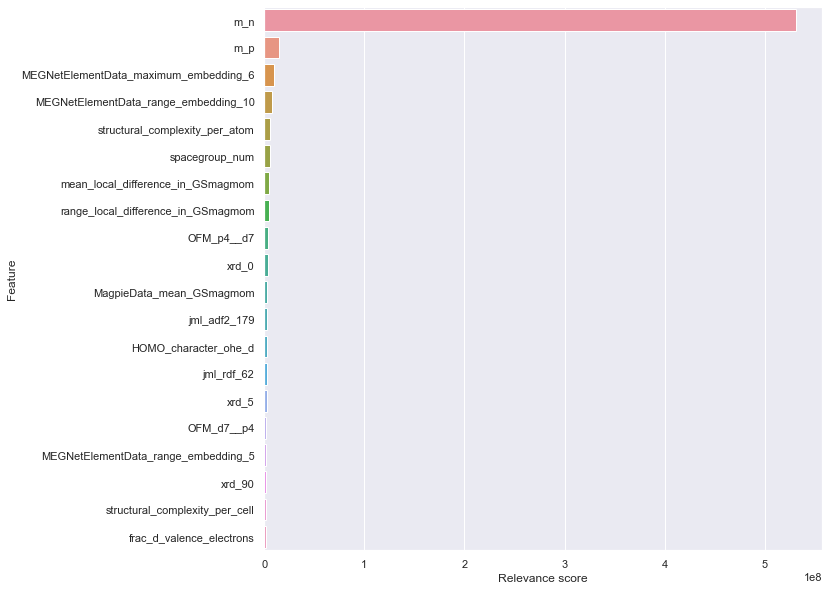

In [5]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [6]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = False, 
                    oversample_technique = None, 
                    chosen_metric = 'rmse',
                    average = 'weighted',
                    no_to_terminate = 200,
                    max_no_imp = 10
                    )

   No. of rows in training set:  5711
No. of features considering:  1

n=1: mae_train=53.3626, mae_validation=146.4838 
n=1: mse_train=8684.2511, mse_validation=33900.9440 
n=1: rmse_train=93.1893, rmse_validation=184.1221 
n=1: r2_train=0.6731, r2_validation=-0.1583 
n=1: max_error_train=1246.0620, max_error_validation=924.1779 
--- 0.3913886547088623 seconds --- 

No. of features considering:  2

n=2: mae_train=44.1252, mae_validation=136.8338 
n=2: mse_train=5507.6843, mse_validation=29630.6049 
n=2: rmse_train=74.2138, rmse_validation=172.1354 
n=2: r2_train=0.7927, r2_validation=-0.0124 
n=2: max_error_train=1048.9105, max_error_validation=925.0050 
--- 0.2867624759674072 seconds --- 

No. of features considering:  3

n=3: mae_train=38.0838, mae_validation=134.4357 
n=3: mse_train=4007.8492, mse_validation=28609.0896 
n=3: rmse_train=63.3076, rmse_validation=169.1422 
n=3: r2_train=0.8492, r2_validation=0.0225 
n=3: max_error_train=812.8701, max_error_validation=941.4997 
--- 0.26

,train_mae,va_mae,train_mse,va_mse,train_rmse,va_rmse,train_r_sq,va_r_sq,train_max_error,va_max_error
no_of_features,,,,,,,,,,
1,53.362556,146.483838,8684.251075,33900.944024,93.189329,184.122090,0.673141,-0.158323,1246.061976,924.177911
2,44.125231,136.833786,5507.684307,29630.604891,74.213774,172.135426,0.792701,-0.012415,1048.910548,925.005048
3,38.083789,134.435666,4007.849157,28609.089610,63.307576,169.142217,0.849152,0.022488,812.870087,941.499740
4,32.951550,131.233155,2945.228623,27886.766412,54.269961,166.993312,0.889147,0.047168,627.776819,927.369321
5,28.115201,138.239300,2046.708330,30343.561829,45.240561,174.194035,0.922966,-0.036775,560.139856,934.110071
...,...,...,...,...,...,...,...,...,...,...
195,9.609051,137.945088,196.093983,28404.862562,14.003356,168.537422,0.992619,0.029466,184.459558,831.178357
196,9.618551,137.247770,191.317291,28041.976359,13.831749,167.457387,0.992799,0.041865,171.776794,866.998191
197,9.645591,137.499324,194.678512,28304.355293,13.952724,168.238983,0.992673,0.032900,188.413249,847.961740


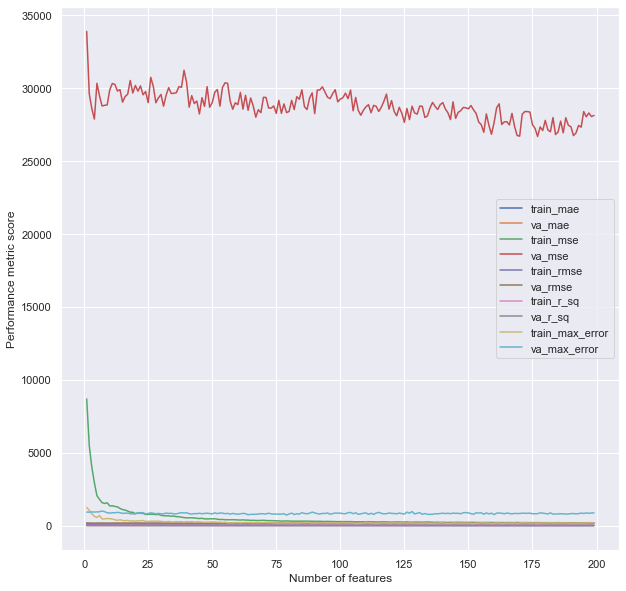

Result saved as: GBFS_convergence_plot_s_n.pkl


<Figure size 720x720 with 0 Axes>

In [7]:
# Plot the result
FS.convergence_plot()

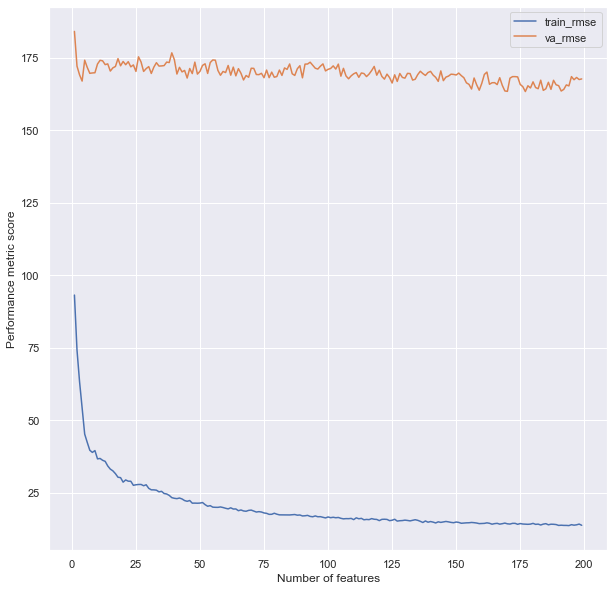

Result saved as: GBFS_convergence_plot_s_n.pkl


<Figure size 720x720 with 0 Axes>

In [8]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_rmse',
                    validation_metric = 'va_rmse'
                    )

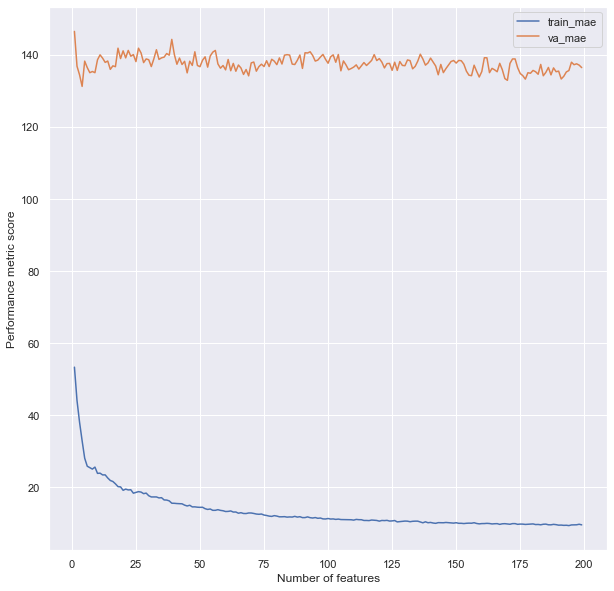

Result saved as: GBFS_convergence_plot_s_n.pkl


<Figure size 720x720 with 0 Axes>

In [9]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_mae',
                    validation_metric = 'va_mae'
                    )

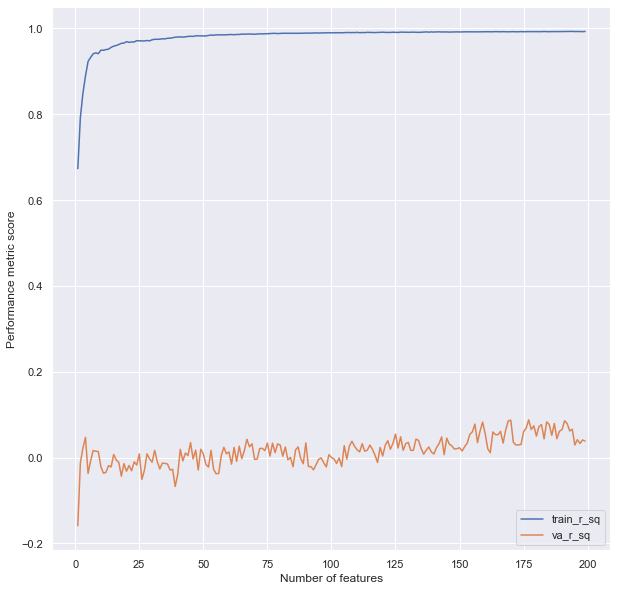

Result saved as: GBFS_convergence_plot_s_n.pkl


<Figure size 720x720 with 0 Axes>

In [10]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_r_sq',
                    validation_metric = 'va_r_sq'
                    )

In [11]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Regression

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 's_n'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_seebeck.pkl'

problem = 'regression'

In [3]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  s_n
No. of exploratory features:  3640


In [4]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  532


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,range_EN_difference,...,crystal_system_ohe_cubic,crystal_system_ohe_hexagonal,crystal_system_ohe_monoclinic,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,pf_n,pf_p,s_n
3510,0.50,0.750,0.666667,0.321569,0.995842,0.877878,0.490178,0.796733,0.947270,0.248889,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000328,0.0286,-831.0
1156,0.50,0.500,0.500000,0.284747,0.860597,0.573947,0.541910,0.381720,0.817204,0.720000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.816000,0.0474,-440.0
4614,0.25,0.500,0.583333,0.396746,0.373969,0.096125,0.649123,0.204301,0.491935,0.475556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.040000,0.6000,-557.0
7074,0.50,0.375,0.416667,0.311805,0.669879,0.522614,0.504548,0.596774,0.596774,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.871000,0.3030,-504.0
1109,0.50,0.375,0.416667,0.300463,0.471527,0.100381,0.541910,0.524194,0.548387,0.040000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.573000,0.8220,-631.0


In [5]:
df_anova = analyses.ANOVA_F_test(
                                problem='regression', 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  167
No. of numerical features:  2942 

Considering only the numerical features. 

Result saved as:  ANOVA_F_test_result_s_n_regression.pkl


,feature_names,f_statistic,f_statistic_scaled
0,MagpieData_maximum_NdUnfilled,1003.076330,1.000000e+00
1,MagpieData_range_NdUnfilled,1003.076330,1.000000e+00
2,range_local_difference_in_NdUnfilled,914.449050,9.116445e-01
3,maximum_local_difference_in_NdUnfilled,877.453259,8.747622e-01
4,jml_ndunfill,772.485053,7.701159e-01
...,...,...,...
2937,OFM_f10__p2,0.000056,4.998374e-08
2938,jml_nn_81,0.000052,4.611849e-08
2939,jml_C24,0.000015,8.439342e-09
2940,jml_C4,0.000015,8.439342e-09


In [6]:
df_mi = analyses.mutual_information(
                                problem='regression', 
                                csv=False
                                )

df_mi

There are:
No. of categorical features:  167
No. of numerical features:  2942 

Result saved as: MI_result_s_n.pkl


,feature_names,MI,MI_scaled
0,MagpieData_maximum_Number,0.307509,1.000000
1,DemlData_maximum_atom_num,0.303401,0.986640
2,MEGNetElementData_maximum_embedding_10,0.291426,0.947698
3,PymatgenData_maximum_atomic_mass,0.285799,0.929399
4,MagpieData_maximum_AtomicWeight,0.285226,0.927537
...,...,...,...
2904,OFM_d5__d1,0.000000,0.000000
2903,OFM_d4__p3,0.000000,0.000000
2902,OFM_d4__p2,0.000000,0.000000
2901,OFM_d4__f10,0.000000,0.000000


#### Feature Engineering 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 's_n'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'
path_to_file = path + 'boltztrap_mp_merged_v2.pkl'  # all data

# Either a list or saved file for the features
features = path + 'features_seebeck.pkl'

problem = 'regression'

In [3]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_regression.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,MagpieData_maximum_NdUnfilled,1003.076330,1.000000
1,MagpieData_range_NdUnfilled,1003.076330,1.000000
2,range_local_difference_in_NdUnfilled,914.449050,0.911645
3,maximum_local_difference_in_NdUnfilled,877.453259,0.874762
4,jml_ndunfill,772.485053,0.770116


In [4]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,MagpieData_maximum_Number,0.307509,1.000000
1,DemlData_maximum_atom_num,0.303401,0.986640
2,MEGNetElementData_maximum_embedding_10,0.291426,0.947698
3,PymatgenData_maximum_atomic_mass,0.285799,0.929399
4,MagpieData_maximum_AtomicWeight,0.285226,0.927537


In [5]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,m_n,5.308070e+08
1,m_p,1.518107e+07
2,MEGNetElementData_maximum_embedding_6,1.013305e+07
3,MEGNetElementData_range_embedding_10,8.114007e+06
4,structural_complexity_per_atom,6.101834e+06


In [6]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  s_n
No. of exploratory features:  3640


In [7]:
# Join the features
feature_list = anova_features + mi_features + gbfs_features

print(len(feature_list))
print(feature_list)

15
['MagpieData_maximum_NdUnfilled', 'MagpieData_range_NdUnfilled', 'range_local_difference_in_NdUnfilled', 'maximum_local_difference_in_NdUnfilled', 'jml_ndunfill', 'MagpieData_maximum_Number', 'DemlData_maximum_atom_num', 'MEGNetElementData_maximum_embedding_10', 'PymatgenData_maximum_atomic_mass', 'MagpieData_maximum_AtomicWeight', 'm_n', 'm_p', 'MEGNetElementData_maximum_embedding_6', 'MEGNetElementData_range_embedding_10', 'structural_complexity_per_atom']


In [8]:
# Perform feature engineering
df, new_cols = perform.brute_force(feature_list = feature_list)

df.head()

,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,MEGNetElementData_range_embedding_10/m_p,m_p/structural_complexity_per_atom,structural_complexity_per_atom/m_p,MEGNetElementData_maximum_embedding_6/MEGNetElementData_range_embedding_10,MEGNetElementData_range_embedding_10/MEGNetElementData_maximum_embedding_6,MEGNetElementData_maximum_embedding_6/structural_complexity_per_atom,structural_complexity_per_atom/MEGNetElementData_maximum_embedding_6,MEGNetElementData_range_embedding_10/structural_complexity_per_atom,structural_complexity_per_atom/MEGNetElementData_range_embedding_10,s_n
0,-2,5,7,3.951631,1,0.803211,0.108118,-282000.0,1.25,2.55,...,0.008441,19.120886,0.052299,0.630829,1.585216,0.101813,9.821964,0.161395,6.195978,-421.0
1,-2,3,5,2.645751,1,0.851088,0.178743,-364000.0,2.06,2.06,...,0.150657,2.536338,0.394269,0.948922,1.053827,0.362600,2.757858,0.382118,2.616993,-393.0
2,-3,3,6,2.770274,1,0.327599,0.073868,-216000.0,0.38,1.26,...,0.283476,0.471645,2.120239,1.409041,0.709703,0.188389,5.308163,0.133700,7.479419,-305.0
3,-1,3,4,2.070197,1,0.894601,0.188900,-328000.0,2.37,3.00,...,0.038953,14.032743,0.071262,0.431904,2.315330,0.236084,4.235782,0.546612,1.829450,-416.0
4,-3,4,7,3.605551,1,0.000025,0.000003,-144000.0,-0.01,-0.01,...,0.181753,0.420830,2.376256,-0.265002,-3.773561,-0.020269,-49.336004,0.076487,13.074123,-496.0


In [9]:
perform.save()

Result saved as: df_s_n_engineered_features.pkl
Result saved as: features_s_n_engineered.pkl
Result saved as: df_train_s_n_engineered.pkl
Result saved as: df_test_s_n_engineered.pkl


#### Multi-Collinearity Reduction

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 's_n'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 80 # Most relevant features defined using the GBFS result
gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'regression'

print(len(gbfs_cols))
print(len(new_cols))
len(features)

80
210


290

In [3]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  s_n
No. of exploratory features:  290


In [4]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.85)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  111
Features saved as: features_selected_from_correlation_analysis_s_n.pkl


Figure saved as: Dendrogram_s_n.png


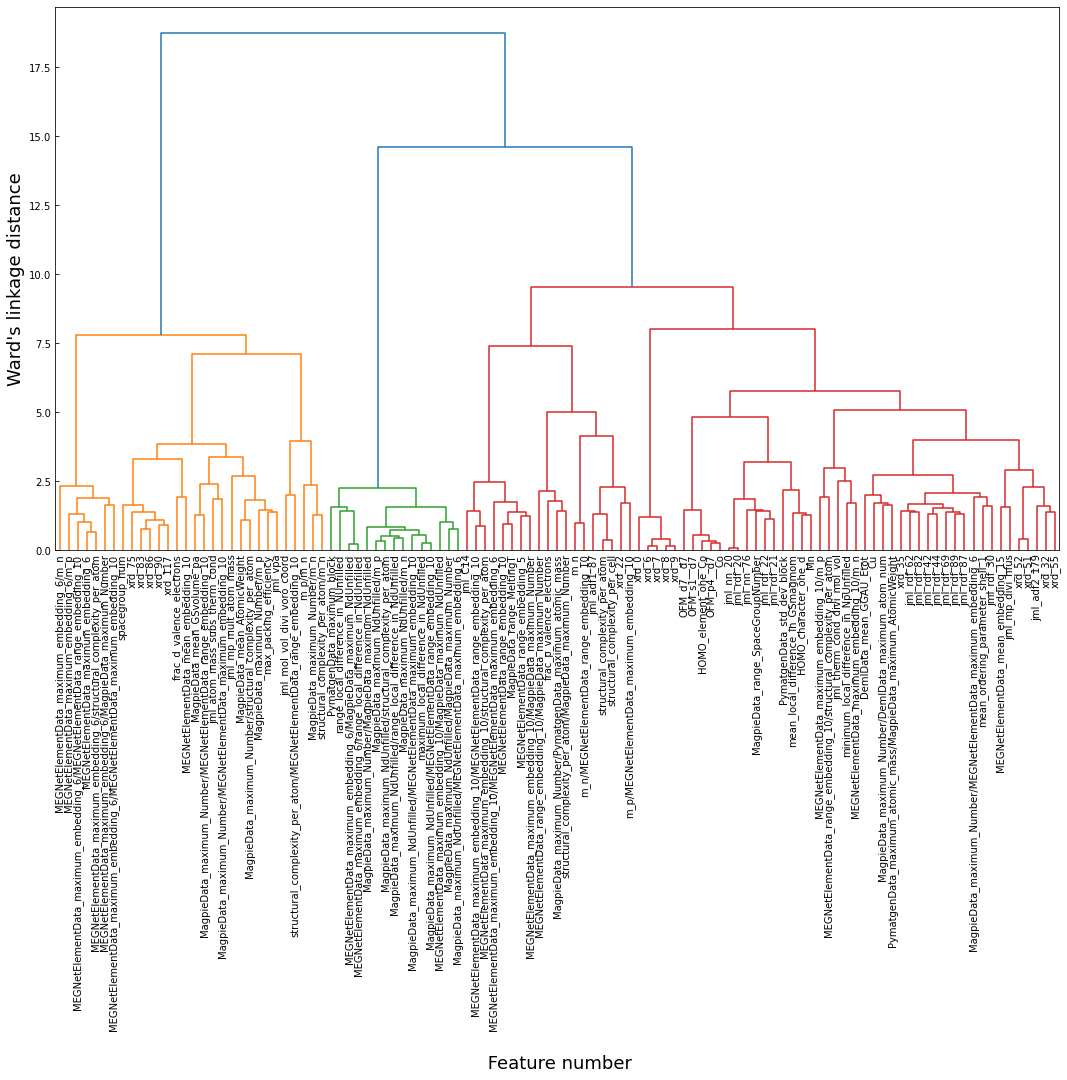

In [5]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [6]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  87
Features saved as features_selected_from_hierarchical_analysis_s_n_threshold_1.pkl
Number of features remaining:  36
Features saved as features_selected_from_hierarchical_analysis_s_n_threshold_2.pkl
Number of features remaining:  19
Features saved as features_selected_from_hierarchical_analysis_s_n_threshold_3.pkl
Number of features remaining:  14
Features saved as features_selected_from_hierarchical_analysis_s_n_threshold_4.pkl
Number of features remaining:  11
Features saved as features_selected_from_hierarchical_analysis_s_n_threshold_5.pkl


In [7]:
# threshold_list = np.linspace(3, 4, 6)

# for i in threshold_list:
#     final_features = data.apply_linkage_threshold(threshold = i)

#### Recursive Feature Elimination

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [2]:
# Target
target = 's_n'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')

scaled = False

problem = 'regression'

In [3]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: s_n
No. of features: 36


In [4]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM')
RFE_features = run.perform()

Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 fea

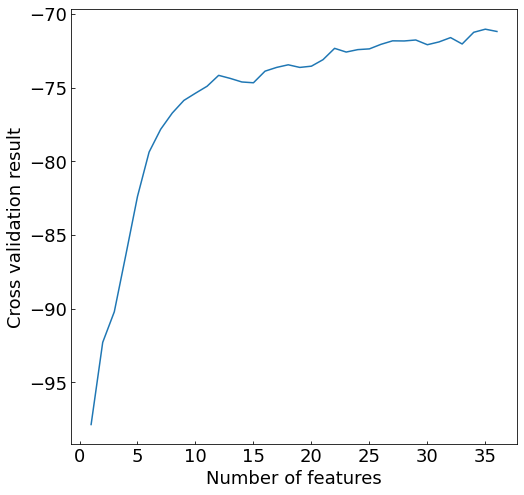

Figure saved as: RFE_plot_s_n.png


In [5]:
# Plot figure
run.RFE_plot()

#### Test Dummy Model

In [1]:
### test result to find best threshold

import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Target
target = 's_n'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
scaled = False
print('No. of features:', len(features))

problem = 'regression'

No. of features: 36


In [3]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

In [4]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective='regression',
                    importance_type='gain',
                    learning_rate=0.1,
                    n_estimators=350,
                    num_leaves=40,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', n_estimators=350, num_leaves=40,
              objective='regression', random_state=42)

In [5]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_lambda_max': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_lambda_max': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_lambda_max'] = df_pred['pred_lambda_max']
df_pred['adj_pred_lambda_max'] = df_pred['adj_pred_lambda_max'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_lambda_max']
y_pred_adj = df_pred['adj_pred_lambda_max']
y_pred = df_pred['pred_lambda_max']

In [6]:
def plot(df_pred, adj=True):
        # Plot results
        max_value = 140
        min_value = -1150

        X = df_pred['act_lambda_max']
        if adj is True:
                Y = df_pred['adj_pred_lambda_max']
        else:
                Y = df_pred['pred_lambda_max']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.1)

        # line of best fit
        offset = 50
        linear_fit = np.linspace(min_value+offset, max_value-offset, max_value)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value+offset, max_value-offset, max_value)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 6)

        onset = 20
        ax_scatter.set_xlabel('DFT Calculation of n-type Seebeck Coeff. (\u03BCV/K)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of n-type Seebeck Coeff. (\u03BCV/K)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)
        # ax_scatter.set_yscale('log')
        # ax_scatter.set_xscale('log')

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 70, 140])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 55, 110])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        if adj is True:
                ax_hist_y.hist(
                                y_pred_adj, 
                                bins=bins, 
                                color=color, 
                                histtype=histtype,
                                alpha=alpha
                                )
        else:
                ax_hist_y.hist(
                                y_pred, 
                                bins=bins, 
                                color=color, 
                                histtype=histtype,
                                alpha=alpha
                                )

        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(-480, -260, r'$y = x$', fontdict=font1)
        ax_scatter.text(-300, -450, r'$y = ' + str(round(results.params[1],1)) + 'x ' + str(round(results.params[0],1)) + '$', fontdict=font2)

        r2 = r2_score(X, Y)
        
        x_label_pos = -375
        ax_scatter.text(x_label_pos, -1015, r'$R^{2}$ = ' + str(round(r2,2)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(x_label_pos, -1070, r'$MAE$ = ' + str(round(mae,2)) + ' \u03BCV/K', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(x_label_pos, -1130, r'$RMSE$ = ' + str(round(mse,2)) + ' \u03BCV/K', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:        pred_lambda_max   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     8726.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:41:03   Log-Likelihood:                -9836.1
No. Observations:                1785   AIC:                         1.968e+04
Df Residuals:                    1783   BIC:                         1.969e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -92.9393      5.086    -18.

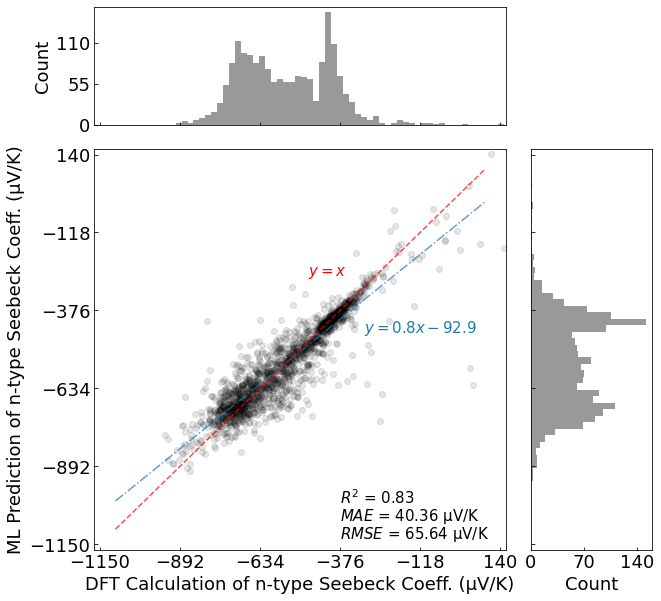

m =  0.8305985705869783
c =  -92.93934487021741 

MAE:  40.35655570610624
MSE:  4308.0531236156185
RMSE:  65.63576101193327
R-squared:  0.8303335764712556
Max error:  676.8967190640243
Explained_variance_score:  0.8303341878882189


In [7]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

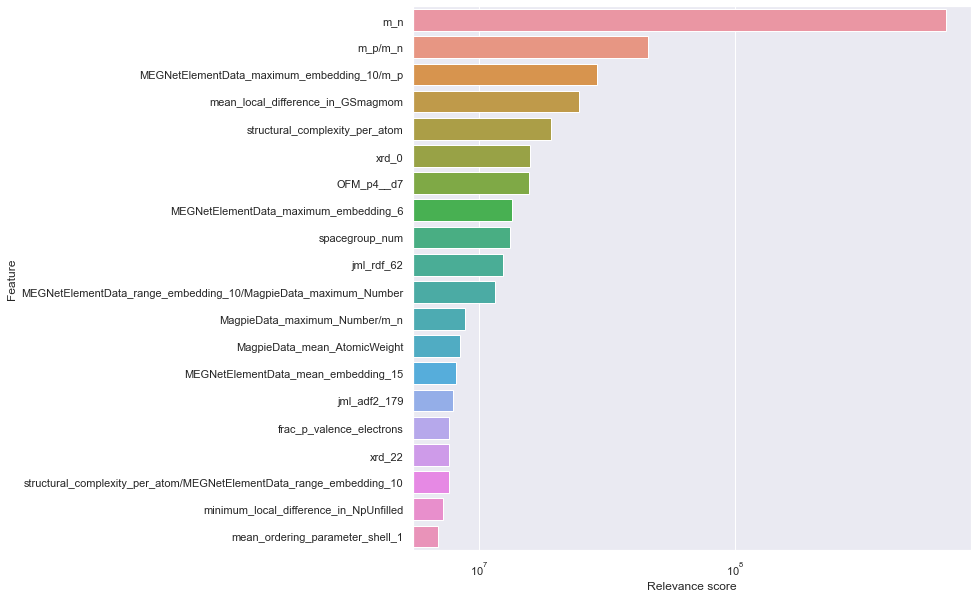

In [8]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)


#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})

# Number of features to plot
no_of_features = 20

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set_xscale("log")
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 's_n'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'

path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'regression'

scaled = False

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  s_n
No. of exploratory features:  35


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM')

LGBMRegressor(importance_type='gain', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.05122233892770107, 'n_estimators': 311, 'num_leaves': 63} 

Score:  72.82239482985733 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 3.3010
Function value obtained: 72.8224
Current minimum: 72.8224
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.41156092744301526, 'n_estimators': 634, 'num_leaves': 35} 

Score:  80.2856576917761 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.5263
Function value obtained: 80.2857
Current minimum: 72.8224
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.3414992106256569, 'n_estimators': 259, 'num_leaves': 20} 

Score:  77.36801106097269 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.4698
Function value obtained: 77.3680
Current minimum: 72.8224
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate': 0.113

Saved: Optimisation_result_s_n.png


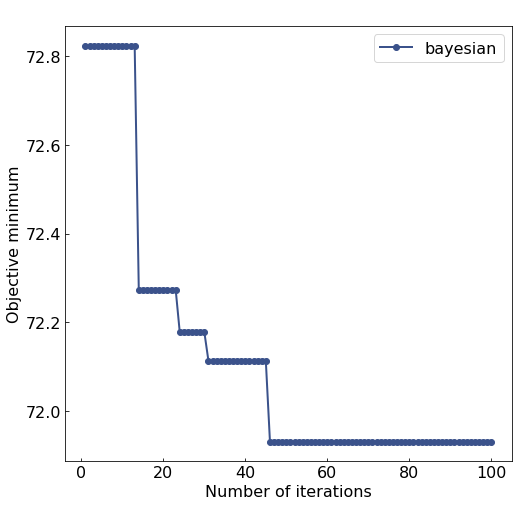

In [7]:
# Plot convergence plot
final_stage.convergence_plot()

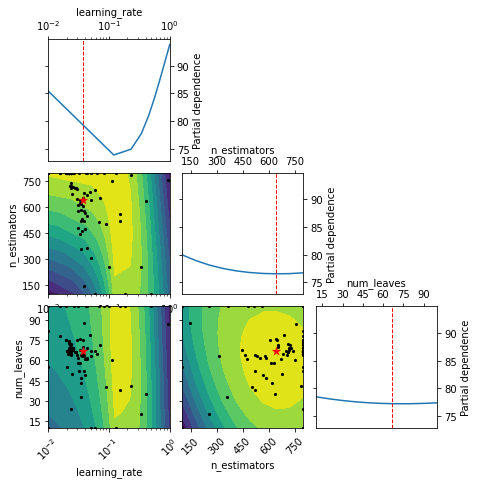

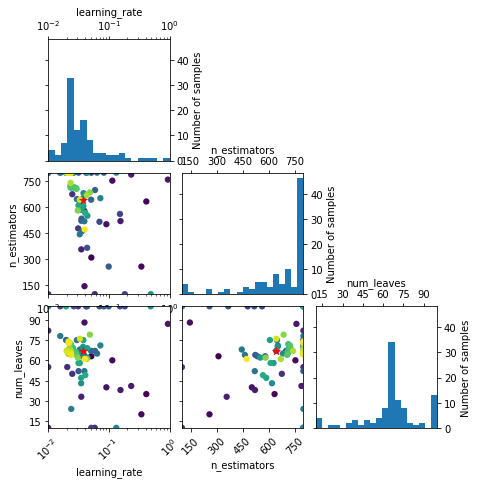

In [8]:
# objective and evaluation plot
final_stage.objective_plot()

In [9]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMRegressor(importance_type='gain', learning_rate=0.037086508861363554,
              n_estimators=644, num_leaves=67, random_state=42)

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     8368.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        21:12:13   Log-Likelihood:                -9846.3
No. Observations:                1785   AIC:                         1.970e+04
Df Residuals:                    1783   BIC:                         1.971e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -99.3147      5.115    -19.415      0.0

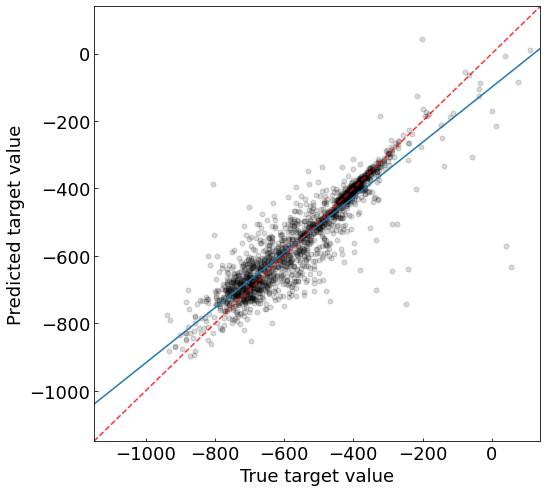

Saved: regression_plot_s_n.png


In [10]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy = 'weighted', 
                    adjusted = False, 
                    max_value = 140,
                    min_value = -1150
                    )


### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Target
target = 's_n'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'

# Features
features = joblib.load(path_to_save + 'features_selected_from_RFE_' + target + '.pkl')
print(len(features))

# Path to training data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'regression'

scaled = False

35


In [3]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective=problem,
                    importance_type='gain',
                    learning_rate=0.037086508861363554,
                    n_estimators=644,
                    num_leaves=67,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', learning_rate=0.037086508861363554,
              n_estimators=644, num_leaves=67, objective='regression',
              random_state=42)

In [4]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_lambda_max': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_lambda_max': predicted_target
                        })
df_pred['adj_pred_lambda_max'] = df_pred['pred_lambda_max']
df_pred['adj_pred_lambda_max'] = df_pred['adj_pred_lambda_max'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_lambda_max']
y_pred_adj = df_pred['adj_pred_lambda_max']
y_pred = df_pred['pred_lambda_max']

In [5]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 347.0
Min value: -939.0


In [6]:
def plot(df_pred, adj=True):
        # Plot results
        max_value = 140
        min_value = -1150

        X = df_pred['act_lambda_max']
        if adj is True:
                Y = df_pred['adj_pred_lambda_max']
        else:
                Y = df_pred['pred_lambda_max']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.1)

        # line of best fit
        offset = 50
        linear_fit = np.linspace(min_value+offset, max_value-offset, max_value)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value+offset, max_value-offset, max_value)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 6)

        onset = 20
        ax_scatter.set_xlabel('DFT Calculation of n-type Seebeck Coeff. (\u03BCV/K)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of n-type Seebeck Coeff. (\u03BCV/K)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)
        # ax_scatter.set_yscale('log')
        # ax_scatter.set_xscale('log')

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 70, 140])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 55, 110])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        if adj is True:
                ax_hist_y.hist(
                                y_pred_adj, 
                                bins=bins, 
                                color=color, 
                                histtype=histtype,
                                alpha=alpha
                                )
        else:
                ax_hist_y.hist(
                                y_pred, 
                                bins=bins, 
                                color=color, 
                                histtype=histtype,
                                alpha=alpha
                                )

        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(-480, -260, r'$y = x$', fontdict=font1)
        ax_scatter.text(-300, -450, r'$y = ' + str(round(results.params[1],1)) + 'x ' + str(round(results.params[0],1)) + '$', fontdict=font2)

        r2 = r2_score(X, Y)
        
        x_label_pos = -375
        ax_scatter.text(x_label_pos, -1015, r'$R^{2}$ = ' + str(round(r2,2)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(x_label_pos, -1070, r'$MAE$ = ' + str(round(mae,2)) + ' \u03BCV/K', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(x_label_pos, -1130, r'$RMSE$ = ' + str(round(mse,2)) + ' \u03BCV/K', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:        pred_lambda_max   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     8458.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:21:46   Log-Likelihood:                -9834.5
No. Observations:                1785   AIC:                         1.967e+04
Df Residuals:                    1783   BIC:                         1.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -99.7603      5.082    -19.

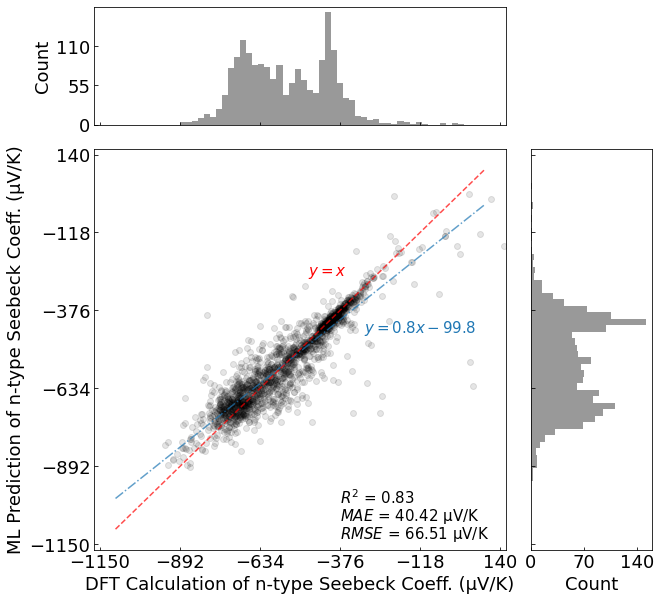

m =  0.8169803597096672
c =  -99.76027680712747 

MAE:  40.42092851578137
MSE:  4423.985314996179
RMSE:  66.51304620144967
R-squared:  0.8257677552710562
Max error:  679.8663808515347
Explained_variance_score:  0.825792030147649


In [7]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

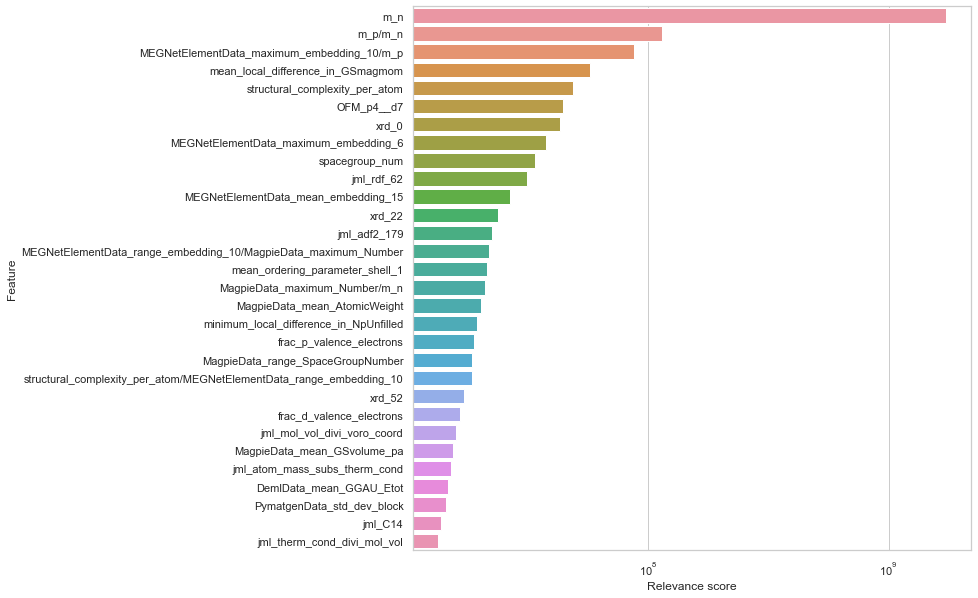

In [8]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set_xscale("log")
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)